# Topic modelling based on titles

In [1]:
from enisa_elastic.elastic import elastic_to_df

df = elastic_to_df('websites')
#df = elastic_to_df('rssfeeds')

Total number of entries: 14655


[========================================================================] 100%


Turning the _source items into columns.


In [2]:
print(len(df))
df.columns

14655


Index(['_id', '_score', 'title', 'link', 'content', 'resource_link',
       'resource_label', 'published'],
      dtype='object')

In [3]:
df.head()

,_id,_score,title,link,content,resource_link,resource_label,published
0,61600cc7bdc83a25bc15adc74eb4902a538092a1,None,Report: US Government Preps WikiLeaks Charges,https://www.bankinfosecurity.com/blogs/report-...,As U.S. government officials continue to ramp ...,https://www.bankinfosecurity.com/latest-news,bankinfosecurity,2017-04-21T00:00:00
1,54f4ff6018e1858688ef91e15172ad77d633c10f,None,Cybersecurity Startup Exposed Hospital Network...,https://www.bankinfosecurity.com/cybersecurity...,Billion-dollar cybersecurity startup Tanium ha...,https://www.bankinfosecurity.com/latest-news,bankinfosecurity,2017-04-20T00:00:00
2,b8499fa0a8bab6ad912a58193d773154e2cd3ef9,None,A CISO's First 100 Days,https://www.bankinfosecurity.com/interviews/ci...,"For a security leader, the first three months ...",https://www.bankinfosecurity.com/latest-news,bankinfosecurity,2016-09-09T00:00:00
3,c95a2283caf7a7ccb4622439f39a4ca32c292254,None,Financial Sector Under Increasing Cybercrime T...,https://www.bankinfosecurity.com/financial-sec...,The financial sector is under increasing threa...,https://www.bankinfosecurity.com/latest-news,bankinfosecurity,2017-11-09T00:00:00
4,a64c4867f697cf23d3d76a00d961d655ceb9174b,None,Exclusive: Aussie Firm Loses $6.6M to Backdoor...,https://www.bankinfosecurity.com/exclusive-aus...,Australian police in Queensland are pursuing a...,https://www.bankinfosecurity.com/latest-news,bankinfosecurity,2018-06-05T00:00:00


In [4]:
#print(len(df[df['description'] == '']))
print("Number of documents with empty content:", len(df[df['content'] == '']))

Number of documents with empty content: 21


In [5]:
df_recent = df[df["published"] > "2018-05-01"]
len(df_recent)

375

In [6]:
X0 = df_recent["title"]

In [7]:
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer 

ps = PorterStemmer()

def tokenizer(text):
    #return [ps.stem(w).lower() for w in word_tokenize(text) if w.isalpha() and len(w)>1]
    return [w.lower() for w in word_tokenize(text) if w.isalpha() and len(w)>1]

In [8]:
from nltk.corpus import stopwords

# Show the English stop words.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# Number of clusters
n = 5

# Number of features, ordered by term frequency
m = 5

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv_max = TfidfVectorizer(lowercase=True, stop_words='english',
                         tokenizer=tokenizer, max_df=0.1, min_df=0.001, max_features=100)

In [11]:
from time import time

t0 = time()
X = tv_max.fit_transform(X0)
print("done in %0.3fs." % (time() - t0))
print("Shape of the X matrix:", X.shape)

done in 0.081s.
Shape of the X matrix: (375, 100)


In [12]:
import numpy as np

freq_pairs  = list(zip(tv_max.get_feature_names(), np.asarray(X.mean(axis=0)).ravel()))
sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:10]

[('security', 0.055557553614825311),
 ('microsoft', 0.042844300311452976),
 ('new', 0.041646269162781344),
 ('data', 0.035097449265840408),
 ('gdpr', 0.031356900249582903),
 ('windows', 0.031147962418297873),
 ('ransomware', 0.024085084707414512),
 ('google', 0.023180439662115786),
 ('breach', 0.022965603302075588),
 ('users', 0.021180692070281604)]

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=n)
t0 = time()
km.fit(X)
print("done in %0.3fs." % (time() - t0))

done in 0.291s.


In [14]:
import pprint

pp = pprint.PrettyPrinter()

print("Cluster center coordinates:")
print("---------------------------")
for c in km.cluster_centers_:
    freq_pairs = list(zip(tv_max.get_feature_names(), c))
    pp.pprint(sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:m])

Cluster center coordinates:
---------------------------
[('security', 0.66294381627030252),
 ('flaw', 0.060715539896162192),
 ('identity', 0.051812009257994708),
 ('fixes', 0.050552442283413004),
 ('researchers', 0.048403169027213436)]
[('gdpr', 0.58794187967967937),
 ('cybersecurity', 0.23709196665491902),
 ('privacy', 0.13634232893272613),
 ('enforcement', 0.06663817527415343),
 ('impact', 0.054988240334999626)]
[('data', 0.045073003771148035),
 ('breach', 0.032376320444655438),
 ('ransomware', 0.029468431951815782),
 ('fraud', 0.027607671991785012),
 ('million', 0.025395006187925249)]
[('windows', 0.53093117758462305),
 ('microsoft', 0.14984202397466792),
 ('build', 0.11777629688469182),
 ('insider', 0.11777629688469182),
 ('april', 0.099467121819556414)]
[('new', 0.35644190151998106),
 ('microsoft', 0.31807602633866228),
 ('adds', 0.057159634738495058),
 ('google', 0.048064690788257675),
 ('cyber', 0.046298690701931745)]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(lowercase=True, stop_words='english',
                     tokenizer=tokenizer, max_df=0.1, min_df=0.001)

In [16]:
t0 = time()
X = tv.fit_transform(X0)
print("done in %0.3fs." % (time() - t0))
print("Shape of the X matrix:", X.shape)

done in 0.068s.
Shape of the X matrix: (375, 1298)


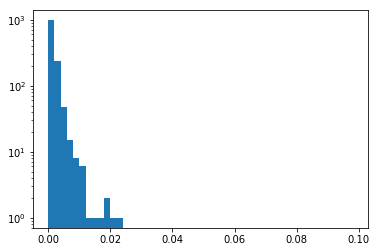

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(np.asarray(X.mean(axis=0)).flatten(), bins=np.arange(0, 0.1, 0.1/50))
plt.yscale('log', nonposy='clip')
plt.show()

In [18]:
t0 = time()
km.fit(X)
print("done in %0.3fs." % (time() - t0))

done in 0.138s.


In [19]:
print("Cluster center coordinates:")
print("---------------------------")
for c in km.cluster_centers_:
    freq_pairs = list(zip(tv.get_feature_names(), c))
    pp.pprint(sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:m])

Cluster center coordinates:
---------------------------
[('windows', 0.058712928848875592),
 ('microsoft', 0.056322215789439509),
 ('new', 0.049059485462805356),
 ('chrome', 0.029493495691770063),
 ('google', 0.027218772416448555)]
[('security', 0.24377986235482532),
 ('identity', 0.067631362450560686),
 ('new', 0.028663595883807208),
 ('models', 0.028321606257666106),
 ('management', 0.027415531901922682)]
[('gdpr', 0.026758526622729283),
 ('breach', 0.019868953872203242),
 ('data', 0.018148812356746355),
 ('million', 0.01813831173647381),
 ('botnet', 0.015218254500321502)]
[('ransomware', 0.16668960479802777),
 ('users', 0.16256045747917924),
 ('week', 0.073143496023894153),
 ('data', 0.050970208430307994),
 ('app', 0.047669337522248341)]
[('cybersecurity', 0.35523161975816281),
 ('future', 0.14840139481927253),
 ('deal', 0.06668971762658317),
 ('bundle', 0.065409233037940565),
 ('means', 0.059531985017023004)]


In [20]:
def print_top_words(model, feature_names, n_top_words):
    keywords = []
    for topic_idx, topic in enumerate(model.components_):
        s = "Topic #%d: " % topic_idx
        s += ", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(s)
        keywords.append([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]])
    return keywords

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, stop_words='english',
                     tokenizer=tokenizer, max_df=0.1, min_df=0.001)

In [22]:
t0 = time()
X = cv.fit_transform(X0)
print("done in %0.3fs." % (time() - t0))
print("Shape of the X matrix:", X.shape)

done in 0.066s.
Shape of the X matrix: (375, 1298)


In [23]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=n, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(X)
print("done in %0.3fs." % (time() - t0))

done in 0.350s.


In [24]:
print("Topics in LDA model:")
print("--------------------")
feature_names = cv.get_feature_names()
keywords = print_top_words(lda, feature_names, m)

Topics in LDA model:
--------------------
Topic #0: new, security, identity, chrome, microsoft
Topic #1: ransomware, million, breach, malware, microsoft
Topic #2: windows, botnet, users, security, ddos
Topic #3: data, facebook, chrome, routers, using
Topic #4: microsoft, deal, bundle, cybersecurity, windows


In [25]:
from enisa_elastic.elastic import es

In [26]:
for c in range(n):
    query = " OR ".join(keywords[c])    
    res = es.search(index="websites", body={"query": {"match": {"content": query}}}, size=10)
    print("Titles from cluster {}".format(c))
    print("---------------------")
    for i in range(10):
        print(res['hits']['hits'][i]['_source']['title'])
        #print(res['hits']['hits'][i]['_score'])
    print()

Titles from cluster 0
---------------------
Google, Microsoft, and Mozilla Put Their Backing Behind New WebAuthn API
Microsoft Takes Jab Back at Google's Security Team
Microsoft Confirms Windows 10 "S Mode"
Tests Show Microsoft Edge Is More Secure Than Chrome and Firefox
Microsoft claims to make Chrome safer with new extension
Google Reducing Trust in Symantec Certificates Following Numerous Slip-Ups
Microsoft Edge Beats Chrome by Over Three Hours in New Battery Usage Test
Chrome Users Reporting Freezes & Timeouts After Windows 10 April Update
Practical passwordless authentication comes a step closer with WebAuthn
Google Launches Enterprise Version of Chrome OS

Titles from cluster 1
---------------------
LinkedIn Sale: Mega Bucks, No Matter Mega Breach
Would Cheaper Windows Upgrades Solve Ransomware Woes?
Antimalware software works, hackers still trying to exploit 6-year-old bugs
Ransomware Onslaught Continues: Old Foes, New Defenses
Maersk Previews NotPetya Impact: Up to $300 Million

In [27]:
t0 = time()
X = tv.fit_transform(X0)
print("done in %0.3fs." % (time() - t0))
print("Shape of the X matrix:", X.shape)

done in 0.076s.
Shape of the X matrix: (375, 1298)


In [28]:
lda = LatentDirichletAllocation(n_components=n, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(X)
print("done in %0.3fs." % (time() - t0))

done in 0.305s.


In [29]:
print("Topics in LDA model:")
print("--------------------")
feature_names = tv.get_feature_names()
keywords = print_top_words(lda, feature_names, m)

Topics in LDA model:
--------------------
Topic #0: security, google, ransomware, chrome, new
Topic #1: users, data, microsoft, windows, million
Topic #2: botnet, security, ddos, users, ready
Topic #3: data, microsoft, new, gdpr, security
Topic #4: deal, windows, bundle, cybersecurity, fraud


In [30]:
for c in range(n):
    query = " OR ".join(keywords[c])    
    res = es.search(index="websites", body={"query": {"match": {"content": query}}}, size=10)
    print("Titles from cluster {}".format(c))
    print("---------------------")
    for i in range(10):
        print(res['hits']['hits'][i]['_source']['title'])
        #print(res['hits']['hits'][i]['_score'])
    print()

Titles from cluster 0
---------------------
Website Uses "Add Extension to Leave" Popups to Infect Chrome Users
Over 318,000 Android Users Affected by Auto-Downloading Malvertising Attack
Fake Chrome Font Pack Update Alerts Infecting Visitors with Spora Ransomware
Sneaky Tech Support Scammers Invent New Tricks to Fool Google Chrome Users
LeakerLocker Ransomware Found in Two Apps on the Google Play Store
Google Chrome 66 Released Today Focuses on Security
Is Ransomware Creeping Into Facebook and LinkedIn?
Google Will Quietly Auto-Migrate Some Users to 64-Bit Chrome
Google Chrome 57 Released with WebAssembly Support, 36 Security Fixes
Chrome Adds Warning for When Extensions Take Over Your Internet Connection

Titles from cluster 1
---------------------
Antimalware software works, hackers still trying to exploit 6-year-old bugs
France Slams Windows 10 Privacy, Security Controls
Windows Defender Advanced Threat Protection uses cloud power to figure out you’ve been pwned
Man Sues Microsoft 

In [31]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=n, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5)
t0 = time()
nmf.fit(X)
print("done in %0.3fs." % (time() - t0))

done in 0.078s.


In [32]:
print("Topics in NMF model (generalized Kullback-Leibler divergence):")
print("--------------------------------------------------------------")
feature_names = tv.get_feature_names()
keywords = print_top_words(nmf, feature_names, m)

Topics in NMF model (generalized Kullback-Leibler divergence):
--------------------------------------------------------------
Topic #0: microsoft, windows, new, google, chrome
Topic #1: cybersecurity, deal, bundle, training, hacking
Topic #2: data, users, breach, fraud, million
Topic #3: security, identity, hackers, flaw, new
Topic #4: gdpr, new, malware, privacy, amazon


In [33]:
for c in range(n):
    query = " OR ".join(keywords[c])    
    res = es.search(index="websites", body={"query": {"match": {"content": query}}}, size=10)
    print("Titles from cluster {}".format(c))
    print("---------------------")
    for i in range(10):
        print(res['hits']['hits'][i]['_source']['title'])
        #print(res['hits']['hits'][i]['_score'])
    print()

Titles from cluster 0
---------------------
Microsoft Takes Jab Back at Google's Security Team
Microsoft Edge Beats Chrome by Over Three Hours in New Battery Usage Test
Google Launches Enterprise Version of Chrome OS
Chrome Users Reporting Freezes & Timeouts After Windows 10 April Update
Gmail Drops Support for Windows XP and Vista Users on Chrome
Project Crostini: Chrome OS to Support Containerized Linux Apps
Google Will Block Third-Party Software From Injecting Code Into Chrome
Microsoft Has Effectively Banned Third-Party Browsers From the Windows Store
Chrome picks up bonus security features on Windows 10
Chrome Beats Edge in Independent Battery Life Test Despite Microsoft's Claims

Titles from cluster 1
---------------------
Get 96% off The Computer Hacker Professional Certification Bundle
Get 96% off The Computer Hacker Professional Certification Training Bundle
Get 96% Off the Ethical Hacking A to Z Training Bundle Deal
93% off the Become an Ethical Hacker Training Bundle
Pay Wha